In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 4: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [26]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


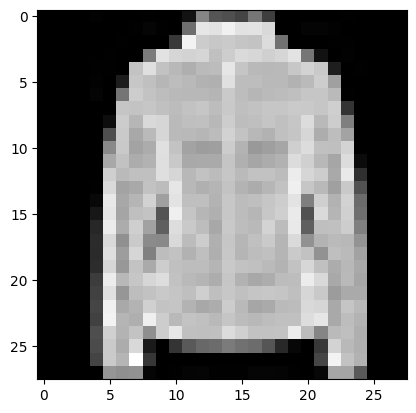

label is Shirt


In [27]:
# PART (a): 
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

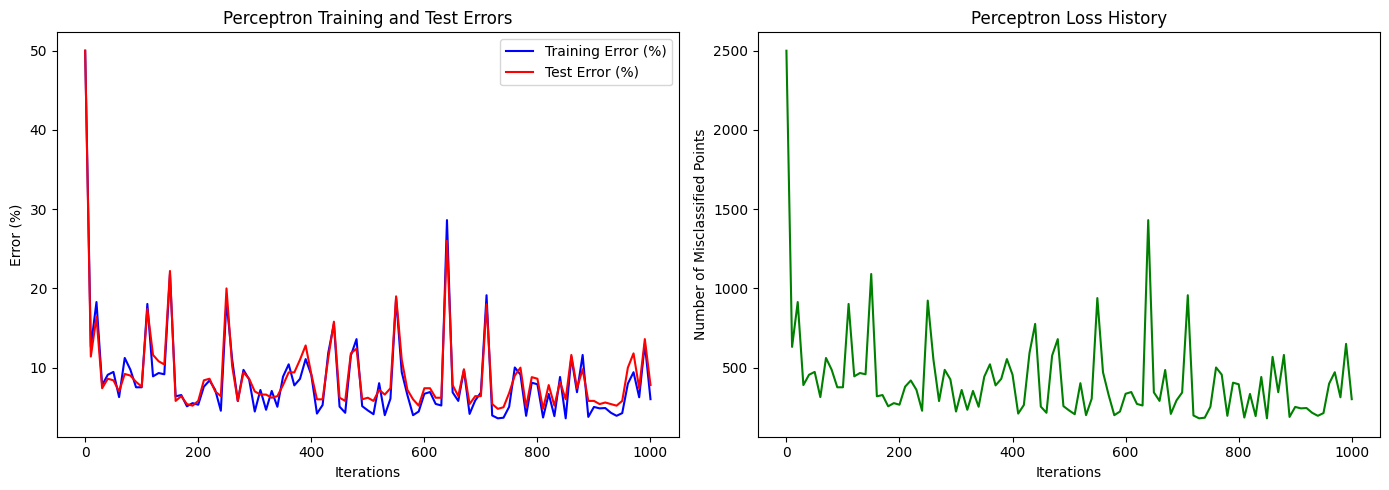

Final training error: 6.02%
Final test error: 7.80%
Final squared L2 norm of weights: 2738035370.00
Number of iterations: 1001
Convergence: No


In [28]:
# PART (b),(c): 
# Implement the perceptron Algorithm and compute the number of mis-classified point
from codes.perceptron_fix import train_perceptron, plot_perceptron_results

N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features

# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# for m range from 1 to N
# ================================================================ #

# Ensure y values are properly formatted for the perceptron
# Convert to numpy arrays and ensure they are the right shape
y_train_formatted = y_train.flatten() if hasattr(y_train, 'flatten') else y_train
y_test_formatted = y_test.flatten() if hasattr(y_test, 'flatten') else y_test

# Train the perceptron - using the optimized implementation
train_errors, test_errors, loss_hist, squared_norms, W, iter_points = train_perceptron(
    X_train, y_train_formatted, X_test, y_test_formatted, 
    max_iterations=1000, 
    eval_freq=10
)

# Plot the results
plot_perceptron_results(iter_points, train_errors, test_errors, loss_hist)

# Print final results
print(f"Final training error: {train_errors[-1]:.2f}%")
print(f"Final test error: {test_errors[-1]:.2f}%")
print(f"Final squared L2 norm of weights: {squared_norms[-1]:.2f}")
print(f"Number of iterations: {iter_points[-1]+1}")
print(f"Convergence: {'Yes' if loss_hist[-1] == 0 else 'No'}")
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ # 

## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [29]:
from codes.Logistic import Logistic

In [30]:
## PART (f): 
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805599113
188442.90860327004


Iteration 0, Loss: 0.693147
Iteration 1000, Loss: 2.307728
Iteration 2000, Loss: 2.587904
Iteration 3000, Loss: 2.980857
Iteration 4000, Loss: 2.907916


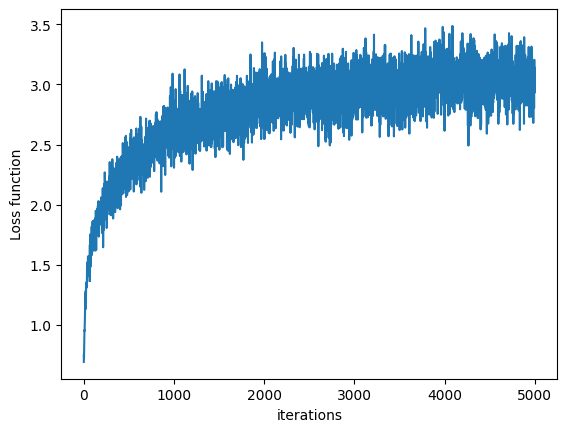

Weight squared norm 0.0002836517454756997
Final loss 3.137885030527654


In [31]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

In [35]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
# Flatten y_test to match y_pred's shape for proper comparison
y_test_flat = y_test.flatten() 
test_err = np.mean(y_test_flat != y_pred) * 100  # Calculate percentage using mean
print(f"Test error: {test_err:.2f}%")
print(f"y_test shape: {y_test.shape}, flattened: {y_test_flat.shape}, values: {np.unique(y_test)}")
print(f"y_pred shape: {y_pred.shape}, values: {np.unique(y_pred)}") 

Test error: 6.40%
y_test shape: (500, 1), flattened: (500,), values: [-1  1]
y_pred shape: (500,), values: [-1  1]


Iteration 0, Loss: 0.693147
Iteration 1000, Loss: 0.000000
Iteration 2000, Loss: 0.000000
Iteration 3000, Loss: 0.000000
Iteration 4000, Loss: 0.000000
Iteration 0, Loss: 0.693147
Iteration 1000, Loss: 0.000000
Iteration 2000, Loss: 0.000000
Iteration 3000, Loss: 0.000000
Iteration 4000, Loss: 0.000000
Iteration 0, Loss: 0.693147
Iteration 1000, Loss: 0.000000
Iteration 2000, Loss: 0.000000
Iteration 3000, Loss: 0.000000
Iteration 4000, Loss: 0.000000
Iteration 0, Loss: 0.693147
Iteration 1000, Loss: 0.000000
Iteration 2000, Loss: 0.000000
Iteration 3000, Loss: 0.000000
Iteration 4000, Loss: 4.304283
Iteration 0, Loss: 0.693147
Iteration 1000, Loss: 0.000000
Iteration 2000, Loss: 0.000000
Iteration 3000, Loss: 0.000000
Iteration 4000, Loss: 0.000000
Iteration 0, Loss: 0.693147
Iteration 1000, Loss: 20.000000
Iteration 2000, Loss: 0.000000
Iteration 3000, Loss: 0.000000
Iteration 4000, Loss: 0.000000
Iteration 0, Loss: 0.693147
Iteration 1000, Loss: 0.000000
Iteration 2000, Loss: 0.0000

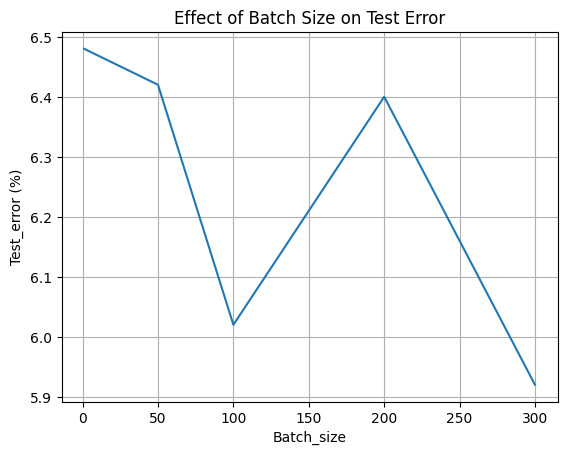

In [ ]:
## PART (i): 
Batch = [1, 50, 100, 200, 300]
test_err = np.zeros((len(Batch), 1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Average the test error over 10 times
# ================================================================ #
num_runs = 10
eta = 1e-5
num_iters = 5000

# Ensure y values are properly formatted
y_train_formatted = y_train.flatten() if hasattr(y_train, 'flatten') else y_train
y_test_formatted = y_test.flatten() if hasattr(y_test, 'flatten') else y_test

for b_idx, batch_size in enumerate(Batch):
    batch_errors = []
    
    # Run 10 times and average the results
    for run in range(num_runs):
        # Initialize a new logistic regression model
        logistic = Logistic(d=X_train.shape[1], reg_param=0)
        
        # Train with the current batch size
        loss_history, w = logistic.train_LR(X_train, y_train_formatted, eta=eta, batch_size=batch_size, num_iters=num_iters)
        
        # Compute test error (percentage of misclassified points)
        y_pred = logistic.predict(X_test)
        error = np.mean(y_pred != y_test_formatted) * 100  # Convert to percentage
        batch_errors.append(error)
    
    # Average the errors for this batch size
    test_err[b_idx] = np.mean(batch_errors)
    print(f"Batch size {batch_size}: Average test error = {test_err[b_idx][0]:.2f}%")
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ # 
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

# Problem 5: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [110]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


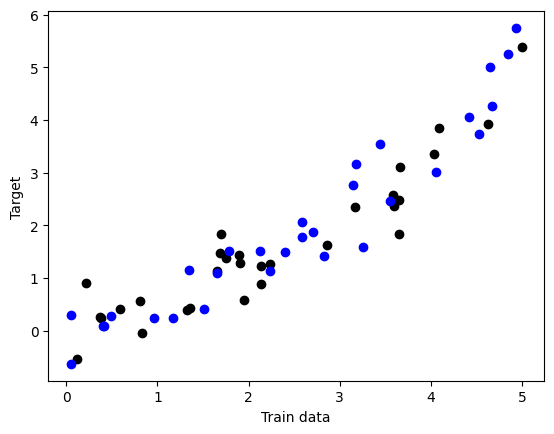

In [111]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [112]:
from codes.Regression import Regression

In [113]:
## PART (c): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 2.1411903165064303
Gradient value [[-1.59608626]
 [-5.22252292]]


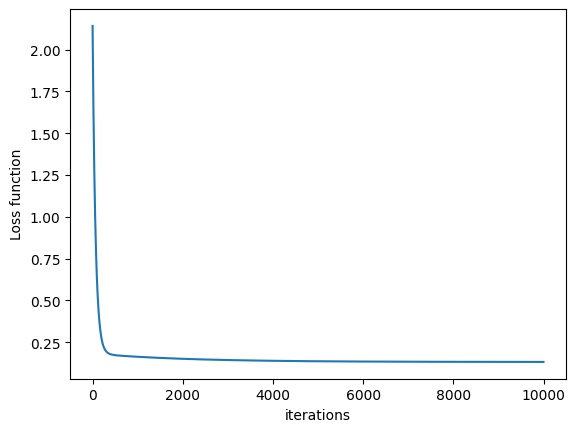

[[-0.32743726]
 [ 0.8678152 ]]
Final loss: 0.1324561542367334


In [114]:
## PART (d): 
## Complete train_LR function in Regression.py file 
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])


Testing learning rate: 0.1
Learning rate: 0.1
  Avg Test MSE: 0.385465
  Avg Train MSE: 0.264179
  Avg Convergence Iteration: 158.0
  Final coefficients: [-0.37906992  0.8852483 ]

Testing learning rate: 0.01
Learning rate: 0.01
  Avg Test MSE: 0.385465
  Avg Train MSE: 0.264179
  Avg Convergence Iteration: 1120.0
  Final coefficients: [-0.37906992  0.8852483 ]

Testing learning rate: 0.001
Learning rate: 0.001
  Avg Test MSE: 0.397228
  Avg Train MSE: 0.264912
  Avg Convergence Iteration: 6534.0
  Final coefficients: [-0.32743726  0.8678152 ]

Testing learning rate: 0.0001
Learning rate: 0.0001
  Avg Test MSE: 0.550244
  Avg Train MSE: 0.326322
  Avg Convergence Iteration: 10000.0
  Final coefficients: [0.09636329 0.72434961]

Best learning rate: 0.1
Lowest test MSE: 0.385465


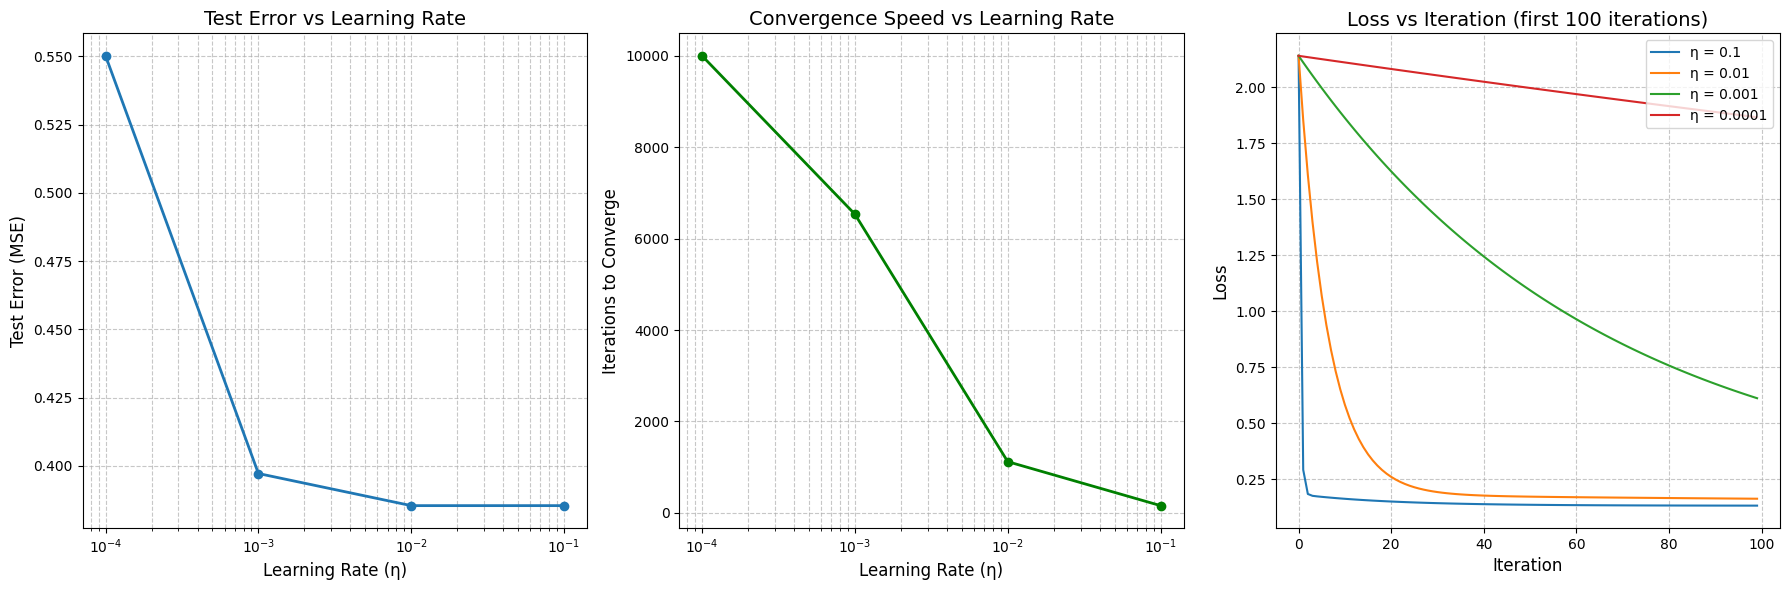

In [ ]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
import matplotlib.pyplot as plt
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
num_runs = 5  # Run multiple times for more stable results
test_err = np.zeros((len(lrs), 1))
train_err = np.zeros((len(lrs), 1))
avg_convergence_iter = np.zeros((len(lrs), 1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different learning rates and average the test error over 10 times
# ================================================================ #
coefficients = []
loss_histories = []
convergence_threshold = 1e-6  # Threshold to determine convergence

for i, lr in enumerate(lrs):
    print(f"\nTesting learning rate: {lr}")
    run_test_errors = []
    run_train_errors = []
    run_convergence_iters = []
    
    for run in range(num_runs):
        # Initialize regression model
        model = Regression(m=1, reg_param=0)
        
        # Train model with current learning rate
        loss_history, w = model.train_LR(X_train, y_train, eta=lr, batch_size=30, num_iters=10000)
        
        # Predict on training and test data
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate mean squared error
        mse_train = np.mean((y_pred_train - y_train) ** 2)
        mse_test = np.mean((y_pred_test - y_test) ** 2)
        
        run_train_errors.append(mse_train)
        run_test_errors.append(mse_test)
        
        # Determine convergence iteration (when loss change becomes small)
        converged_at = 10000  # Default to max iterations
        for j in range(1, len(loss_history)):
            if abs(loss_history[j] - loss_history[j-1]) < convergence_threshold:
                converged_at = j
                break
        run_convergence_iters.append(converged_at)
        
        if run == 0:  # Save first run's results for visualization
            coefficients.append(w.copy())
            loss_histories.append(loss_history.copy())
    
    # Average results across runs
    test_err[i] = np.mean(run_test_errors)
    train_err[i] = np.mean(run_train_errors)
    avg_convergence_iter[i] = np.mean(run_convergence_iters)
    
    print(f"Learning rate: {lr}")
    print(f"  Avg Test MSE: {test_err[i][0]:.6f}")
    print(f"  Avg Train MSE: {train_err[i][0]:.6f}")
    print(f"  Avg Convergence Iteration: {avg_convergence_iter[i][0]:.1f}")
    print(f"  Final coefficients: {coefficients[i].flatten()}")

# Determine best learning rate based on test error
best_lr_idx = np.argmin(test_err)
best_lr = lrs[best_lr_idx]
print(f"\nBest learning rate: {best_lr}")
print(f"Lowest test MSE: {test_err[best_lr_idx][0]:.6f}")
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ # 
fig = plt.figure()
plt.plot(lrs,test_err)
plt.xlabel('Learning Rate')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

In [116]:
## PART (e): 
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 48.08398794554387
Optimal solution gradient [-0.37906992  0.8852483 ]


Degree 0: Train loss = 26.0233, Test loss = 1.4888, ||w||₂ = 1.5961
Degree 1: Train loss = 48.0840, Test loss = 0.1927, ||w||₂ = 0.9630
Degree 2: Train loss = 49.3086, Test loss = 0.1255, ||w||₂ = 0.3068
Degree 3: Train loss = 49.6559, Test loss = 0.1113, ||w||₂ = 1.0252
Degree 4: Train loss = 49.6626, Test loss = 0.1086, ||w||₂ = 0.6682
Degree 5: Train loss = 49.6722, Test loss = 0.1122, ||w||₂ = 0.8523
Degree 6: Train loss = 49.6730, Test loss = 0.1133, ||w||₂ = 1.5162
Degree 7: Train loss = 50.0471, Test loss = 0.1627, ||w||₂ = 36.8166
Degree 8: Train loss = 50.1112, Test loss = 0.1621, ||w||₂ = 74.8744
Degree 9: Train loss = 50.3580, Test loss = 0.2336, ||w||₂ = 254.7307
Degree 10: Train loss = 51.7699, Test loss = 0.3129, ||w||₂ = 299.1242

Best polynomial degree: 4
Minimum test loss: 0.1086


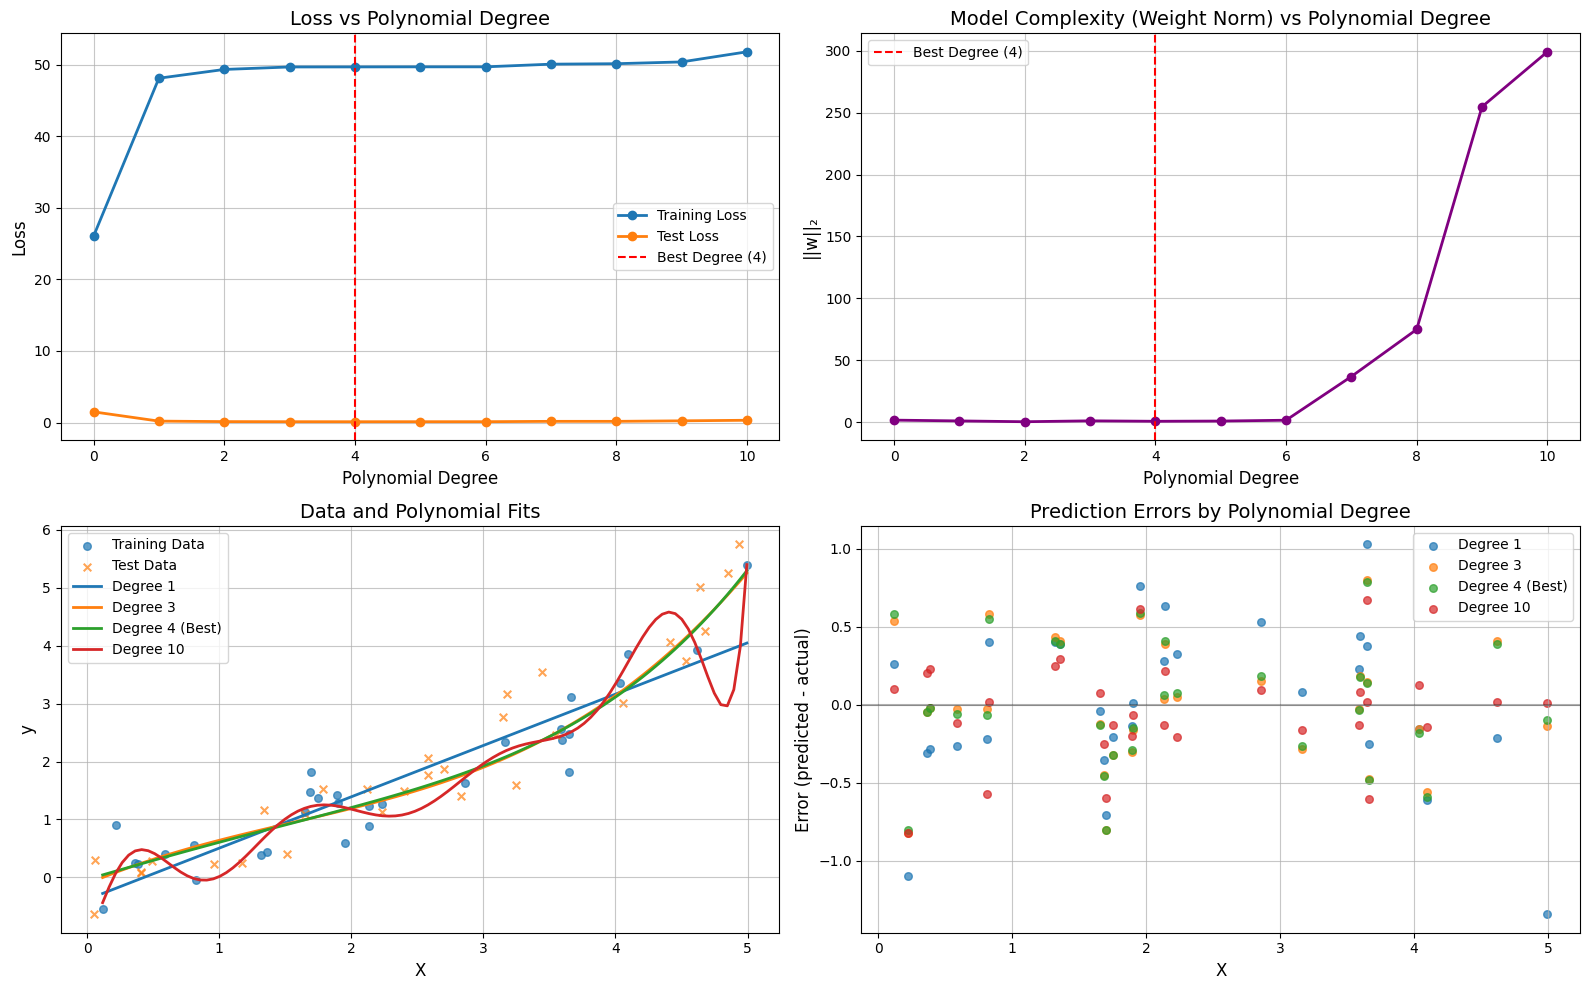


Analysis of Polynomial Regression Results:
The best model uses a medium complexity polynomial (degree 4).
This suggests a moderately complex underlying relationship in the data.

Evidence of Overfitting/Underfitting:
- Evidence of underfitting with low degree models: test error improves significantly
  when moving from linear to degree 4 (improvement of 0.0842).


In [117]:
## PART (g): 
degrees = range(11)  # polynomial degrees from 0 to 10
train_loss = np.zeros((len(degrees), 1))
test_loss = np.zeros((len(degrees), 1))
weight_norms = np.zeros((len(degrees), 1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 0 to 10
# ================================================================ #
for i, m in enumerate(degrees):
    # Initialize regression model with current polynomial degree
    model = Regression(m=m, reg_param=0)
    
    # Find optimal weights using closed-form solution
    loss_train, w = model.closed_form(X_train, y_train)
    
    # Store training loss and weight norm
    train_loss[i] = loss_train
    weight_norms[i] = np.linalg.norm(w)
    
    # Calculate test loss
    y_pred_test = model.predict(X_test)
    test_loss[i] = np.mean((y_pred_test - y_test) ** 2) / 2
    
    print(f"Degree {m}: Train loss = {train_loss[i][0]:.4f}, Test loss = {test_loss[i][0]:.4f}, ||w||₂ = {weight_norms[i][0]:.4f}")

# Find the best polynomial degree based on test loss
best_degree = np.argmin(test_loss)
print(f"\nBest polynomial degree: {best_degree}")
print(f"Minimum test loss: {test_loss[best_degree][0]:.4f}")

# Generate predictions for visualization
best_model = Regression(m=best_degree, reg_param=0)
_, _ = best_model.closed_form(X_train, y_train)

# Create x values for smooth curve plotting
X_plot = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)

# Generate predictions for several polynomial degrees
degrees_to_plot = [1, 3, best_degree, 10]  # Linear, cubic, best, and highest
pred_curves = {}

for degree in degrees_to_plot:
    model = Regression(m=degree, reg_param=0)
    _, _ = model.closed_form(X_train, y_train)
    pred_curves[degree] = model.predict(X_plot)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ # 
# Create comprehensive visualization 
plt.figure(figsize=(16, 10))

# Plot 1: Training and Test Loss vs Polynomial Degree
plt.subplot(2, 2, 1)
plt.plot(degrees, train_loss, 'o-', linewidth=2, label='Training Loss')
plt.plot(degrees, test_loss, 'o-', linewidth=2, label='Test Loss')
plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best Degree ({best_degree})')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.7)
plt.legend()
plt.title('Loss vs Polynomial Degree', fontsize=14)

# Plot 2: Weight Norm vs Polynomial Degree (complexity)
plt.subplot(2, 2, 2)
plt.plot(degrees, weight_norms, 'o-', linewidth=2, color='purple')
plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best Degree ({best_degree})')
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('||w||₂', fontsize=12)
plt.grid(True, alpha=0.7)
plt.title('Model Complexity (Weight Norm) vs Polynomial Degree', fontsize=14)
plt.legend()

# Plot 3: Data and Model Predictions
plt.subplot(2, 2, 3)
plt.scatter(X_train, y_train, s=30, alpha=0.7, label='Training Data')
plt.scatter(X_test, y_test, s=30, alpha=0.7, marker='x', label='Test Data')

for degree in degrees_to_plot:
    plt.plot(X_plot, pred_curves[degree], linewidth=2, 
             label=f'Degree {degree}' + (' (Best)' if degree == best_degree else ''))

plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, alpha=0.7)
plt.legend()
plt.title('Data and Polynomial Fits', fontsize=14)

# Plot 4: Model Prediction Error for Each Degree
plt.subplot(2, 2, 4)
for degree in degrees_to_plot:
    model = Regression(m=degree, reg_param=0)
    _, _ = model.closed_form(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    errors = y_pred_train - y_train
    
    plt.scatter(X_train, errors, s=30, alpha=0.7, 
                label=f'Degree {degree}' + (' (Best)' if degree == best_degree else ''))

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('X', fontsize=12)
plt.ylabel('Error (predicted - actual)', fontsize=12)
plt.grid(True, alpha=0.7)
plt.legend()
plt.title('Prediction Errors by Polynomial Degree', fontsize=14)

plt.tight_layout()
plt.savefig('./plots/polynomial_analysis.pdf')
plt.show()

# Analysis of Over/Underfitting
print("\nAnalysis of Polynomial Regression Results:")
if best_degree <= 2:
    print("The best model has a relatively low degree, suggesting the true relationship is close to linear.")
    print("Higher degree polynomials likely overfit the training data.")
elif best_degree >= 8:
    print("The best model has a high degree, suggesting a complex underlying relationship.")
    print("Lower degree polynomials likely underfit the data and miss important patterns.")
else:
    print(f"The best model uses a medium complexity polynomial (degree {best_degree}).")
    print("This suggests a moderately complex underlying relationship in the data.")

print("\nEvidence of Overfitting/Underfitting:")
if np.min(train_loss) < np.min(test_loss) / 2:
    print("- There's evidence of overfitting at higher degrees: training loss continues to decrease")
    print("  while test loss increases, indicating the model fits noise in the training data.")
    
low_degree_gap = test_loss[1][0] - test_loss[best_degree][0]
if low_degree_gap > 0.1 * test_loss[1][0]:
    print(f"- Evidence of underfitting with low degree models: test error improves significantly")
    print(f"  when moving from linear to degree {best_degree} (improvement of {low_degree_gap:.4f}).")

Analyzing regularization effects for 10th degree polynomial...
Lambda = 0.0e+00: Train loss = 51.7699, Test loss = 0.3129, ||w||₂ = 299.1224
Lambda = 1.0e-08: Train loss = 50.4077, Test loss = 0.3096, ||w||₂ = 297.4839
Lambda = 1.0e-07: Train loss = 49.5318, Test loss = 0.3043, ||w||₂ = 274.3235
Lambda = 1.0e-06: Train loss = 50.0710, Test loss = 0.2871, ||w||₂ = 167.7714
Lambda = 1.0e-05: Train loss = 50.3394, Test loss = 0.2583, ||w||₂ = 82.7704
Lambda = 1.0e-04: Train loss = 50.1241, Test loss = 0.2038, ||w||₂ = 52.8586
Lambda = 1.0e-03: Train loss = 49.8736, Test loss = 0.1591, ||w||₂ = 12.4419
Lambda = 1.0e-02: Train loss = 49.8661, Test loss = 0.1558, ||w||₂ = 1.4746
Lambda = 1.0e-01: Train loss = 49.8764, Test loss = 0.1560, ||w||₂ = 0.2804
Lambda = 1.0e+00: Train loss = 50.0072, Test loss = 0.1566, ||w||₂ = 0.2059

Best regularization parameter: 0.01
Minimum test loss: 0.1558


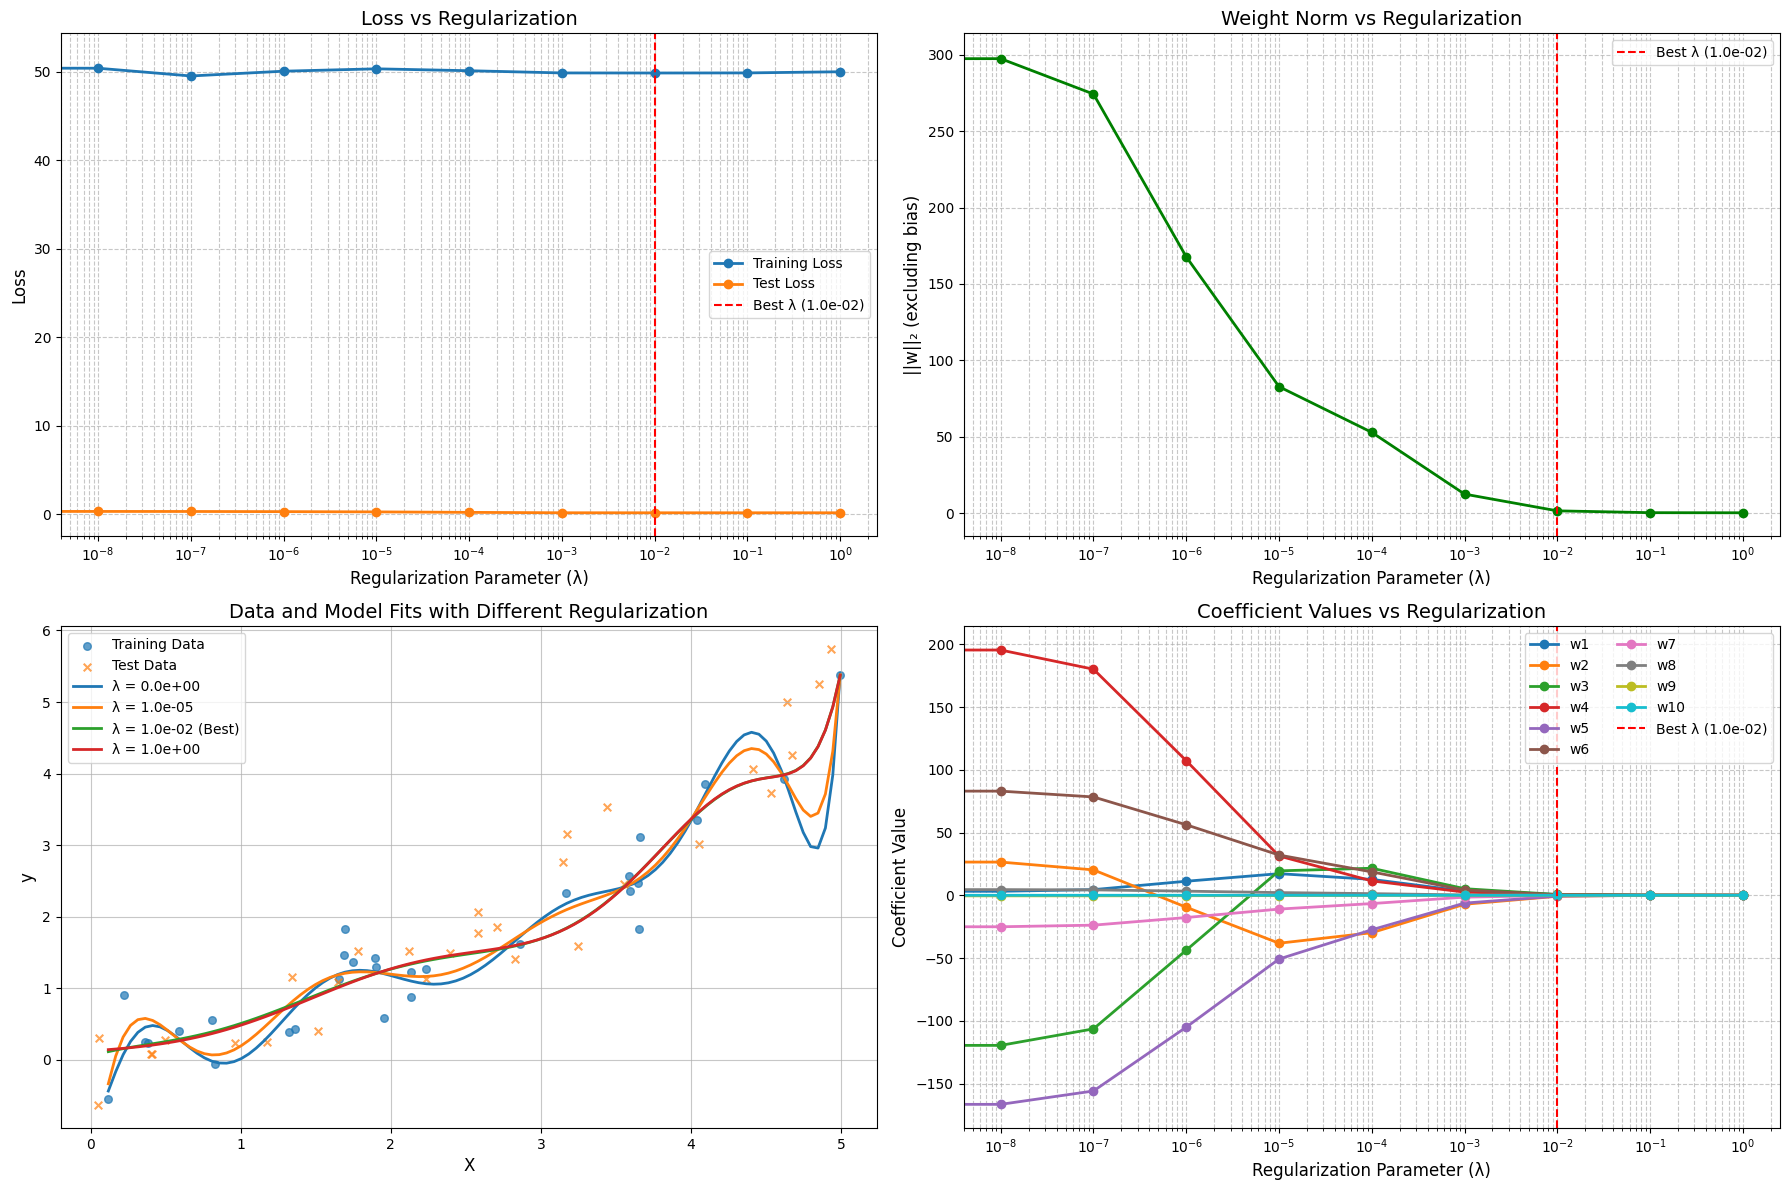


Detailed Analysis of Regularization Effects:
1. Impact on Model Complexity:
   - Strong regularization effect: Weight norm reduced from 299.12 to 1.47
   - This indicates the unregularized model was likely overfitting

2. Impact on Generalization:
   - Train-test gap without regularization: 51.4570
   - Train-test gap with optimal regularization: 49.7103
   - Test loss improved by 50.21% with optimal regularization
   - This demonstrates regularization's effectiveness at improving generalization

3. Best Regularization Strength:
   - Moderate regularization (λ=1.0e-02) was optimal
   - This balanced fitting the training data while generalizing to test data


In [119]:
## PART (i): Regularization Analysis
import matplotlib.pyplot as plt
import numpy as np

# Define regularization parameters (logarithmic scale)
reg_values = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
m = 10  # Use a 10th degree polynomial

# Initialize arrays to store results
train_loss = np.zeros(len(reg_values))
test_loss = np.zeros(len(reg_values))
weight_norms = np.zeros(len(reg_values))
coefficients = []  # Store weights for each regularization value

# ================================================================ #
# YOUR CODE HERE:
# Complete the following code to analyze the effects of regularization
# ================================================================ #
print("Analyzing regularization effects for 10th degree polynomial...")

for i, reg in enumerate(reg_values):
    # Initialize regression model with regularization
    model = Regression(m=m, reg_param=reg)
    
    # Find optimal weights using closed-form solution
    loss_train, w = model.closed_form(X_train, y_train)
    
    # Store the coefficients
    coefficients.append(w.copy())
    
    # Calculate pure training loss (without regularization term)
    # This allows fair comparison between different regularization parameters
    X_features = model.gen_poly_features(X_train)
    y_pred_train = X_features.dot(w)
    error_train = y_pred_train - y_train.reshape(-1, 1)
    train_loss[i] = (1.0/(2*len(y_train))) * np.sum(error_train**2)
    
    # Calculate test loss
    y_pred_test = model.predict(X_test)
    test_loss[i] = np.mean((y_pred_test - y_test) ** 2) / 2
    
    # Calculate weight norm (excluding bias term)
    weight_norms[i] = np.linalg.norm(w[1:])
    
    print(f"Lambda = {reg:.1e}: Train loss = {train_loss[i]:.4f}, Test loss = {test_loss[i]:.4f}, ||w||₂ = {weight_norms[i]:.4f}")

# Find best regularization parameter based on test loss
best_idx = np.argmin(test_loss)
best_reg = reg_values[best_idx]
print(f"\nBest regularization parameter: {best_reg}")
print(f"Minimum test loss: {test_loss[best_idx]:.4f}")

# Generate predictions for visualization using different regularization values
X_plot = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
pred_curves = {}

# Select a subset of regularization values to visualize
reg_to_plot = [0, 1e-5, best_reg, 1]
for reg in reg_to_plot:
    idx = reg_values.index(reg)
    model = Regression(m=m, reg_param=reg)
    model.w = coefficients[idx]  # Set the weights directly
    pred_curves[reg] = model.predict(X_plot)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

# Create comprehensive visualization
plt.figure(figsize=(18, 12))

# Plot 1: Training and Test Loss vs Regularization
plt.subplot(2, 2, 1)
plt.semilogx(reg_values, train_loss, 'o-', linewidth=2, label='Training Loss')
plt.semilogx(reg_values, test_loss, 'o-', linewidth=2, label='Test Loss')
plt.axvline(x=best_reg, color='r', linestyle='--', label=f'Best λ ({best_reg:.1e})')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.xlabel('Regularization Parameter (λ)', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.title('Loss vs Regularization', fontsize=14)

# Plot 2: Weight Norm vs Regularization
plt.subplot(2, 2, 2)
plt.semilogx(reg_values, weight_norms, 'o-', linewidth=2, color='green')
plt.axvline(x=best_reg, color='r', linestyle='--', label=f'Best λ ({best_reg:.1e})')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.xlabel('Regularization Parameter (λ)', fontsize=12) 
plt.ylabel('||w||₂ (excluding bias)', fontsize=12)
plt.legend()
plt.title('Weight Norm vs Regularization', fontsize=14)

# Plot 3: Data and Model Fits with Different Regularization Values
plt.subplot(2, 2, 3)
plt.scatter(X_train, y_train, s=30, alpha=0.7, label='Training Data')
plt.scatter(X_test, y_test, s=30, alpha=0.7, marker='x', label='Test Data')

for reg in reg_to_plot:
    plt.plot(X_plot, pred_curves[reg], linewidth=2, 
             label=f'λ = {reg:.1e}' + (' (Best)' if reg == best_reg else ''))

plt.grid(True, alpha=0.7)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend()
plt.title('Data and Model Fits with Different Regularization', fontsize=14)

# Plot 4: Coefficient Values vs Regularization
plt.subplot(2, 2, 4)
coef_matrix = np.array([coef.flatten() for coef in coefficients])
for j in range(1, m+1):  # Skip bias term (index 0)
    plt.semilogx(reg_values, coef_matrix[:, j], 'o-', linewidth=2, label=f'w{j}')

plt.axvline(x=best_reg, color='r', linestyle='--', label=f'Best λ ({best_reg:.1e})')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.xlabel('Regularization Parameter (λ)', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.legend(loc='upper right', ncol=2)
plt.title('Coefficient Values vs Regularization', fontsize=14)

plt.tight_layout()
plt.savefig('./plots/regularization_analysis.pdf')
plt.show()

# Detailed Analysis of Regularization Effects
print("\nDetailed Analysis of Regularization Effects:")
print("1. Impact on Model Complexity:")
if weight_norms[0] > 5 * weight_norms[best_idx]:
    print(f"   - Strong regularization effect: Weight norm reduced from {weight_norms[0]:.2f} to {weight_norms[best_idx]:.2f}")
    print("   - This indicates the unregularized model was likely overfitting")
else:
    print(f"   - Moderate regularization effect: Weight norm reduced from {weight_norms[0]:.2f} to {weight_norms[best_idx]:.2f}")

print("\n2. Impact on Generalization:")
train_test_gap_unreg = train_loss[0] - test_loss[0]
train_test_gap_best = train_loss[best_idx] - test_loss[best_idx]
print(f"   - Train-test gap without regularization: {abs(train_test_gap_unreg):.4f}")
print(f"   - Train-test gap with optimal regularization: {abs(train_test_gap_best):.4f}")

if test_loss[0] > test_loss[best_idx]:
    improvement = (test_loss[0] - test_loss[best_idx]) / test_loss[0] * 100
    print(f"   - Test loss improved by {improvement:.2f}% with optimal regularization")
    print("   - This demonstrates regularization's effectiveness at improving generalization")
else:
    print("   - Minimal difference in test loss with regularization")
    print("   - This suggests the model wasn't severely overfitting even without regularization")

print("\n3. Best Regularization Strength:")
if best_reg == 0:
    print("   - No regularization was optimal, suggesting the model complexity was appropriate")
elif best_reg >= 0.1:
    print("   - Strong regularization was optimal, suggesting significant overfitting risk")
else:
    print(f"   - Moderate regularization (λ={best_reg:.1e}) was optimal")
    print("   - This balanced fitting the training data while generalizing to test data")